In [1]:
 from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Data Glacier/week8

/content/drive/My Drive/Data Glacier/week8


### Data tranformation

In [3]:
#we import our librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import spacy
import nltk
import collections
import  json
import spacy.cli

spacy.cli.download("en_core_web_lg")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
lst_dics = []
with open('Resume.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append( json.loads(dic) )## print the first one      
lst_dics[0]

{'content': 'Govardhana K\nSenior Software Engineer\n\nBengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/\nb2de315d95905b68\n\nTotal IT experience 5 Years 6 Months\nCloud Lending Solutions INC 4 Month • Salesforce Developer\nOracle 5 Years 2 Month • Core Java Developer\nLanguages Core Java, Go Lang\nOracle PL-SQL programming,\nSales Force Developer with APEX.\n\nDesignations & Promotions\n\nWilling to relocate: Anywhere\n\nWORK EXPERIENCE\n\nSenior Software Engineer\n\nCloud Lending Solutions -  Bangalore, Karnataka -\n\nJanuary 2018 to Present\n\nPresent\n\nSenior Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2016 to December 2017\n\nStaff Consultant\n\nOracle -  Bangalore, Karnataka -\n\nJanuary 2014 to October 2016\n\nAssociate Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2012 to December 2013\n\nEDUCATION\n\nB.E in Computer Science Engineering\n\nAdithya Institute of Technology -  Tamil Nadu\n\nSeptember 2008 to June 2012\n\n

In [5]:
#read the data with pandas
df = pd.read_json('Resume.json', lines=True)
df.head()

,content,annotation
0,Govardhana K\nSenior Software Engineer\n\nBeng...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli\nTest Analyst at Oracle, Hy...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria\nData Analyst Intern - Oracle ...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin\nAssociate Consultant - State ...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari\njava developer\n\nPune, Maha...","[{'label': ['Skills'], 'points': [{'start': 18..."


In [6]:
#we remove the trailled \n in the firat column
df['content'] = df['content'].str.split('\n').str.join(' ')

In [7]:
df.head()

,content,annotation
0,Govardhana K Senior Software Engineer Bengalu...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli Test Analyst at Oracle, Hyd...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria Data Analyst Intern - Oracle R...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin Associate Consultant - State S...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari java developer Pune, Maharas...","[{'label': ['Skills'], 'points': [{'start': 18..."


In [8]:
df['content'][2]

'Hartej Kathuria Data Analyst Intern - Oracle Retail  Bengaluru, Karnataka - Email me on Indeed: indeed.com/r/Hartej-Kathuria/04181c5962a4af19  Willing to relocate to: Delhi - Bangalore, Karnataka - Gurgaon, Haryana  WORK EXPERIENCE  Data Analyst Intern  Oracle Retail -  Bengaluru, Karnataka -  June 2017 to Present  Job Responsibilities: o As an intern part of the Global Retail Insights team at Oracle Retail, work involved creating a data oriented buisness case based using high level trends for various retailers using Excel and SQL. o Forecasting Sales with use of various statistical Modelling Methods using SQL and R o Market Basket Analysis using transactional data of retailers using SQL and R  EDUCATION  Statistics and Probability  Manipal University  May 2018  B. Tech in Electrical and Electronics in Embedded Systems  MIT, Manipal University  May 2016  SKILLS  Python (2 years), SQL. (1 year), NOSQL (1 year), R (2 years), Machine Learning (2 years)  PUBLICATIONS  Post-operative life 

In [9]:
#we loop over the second column to also remove the \n
for sub in df['annotation']:
  for line in sub:
    for elt in line['points']:
      elt['text'] = elt['text'].rsplit('\n')
      print(elt['text'])
   # print(line['points'])
  #print(sub[0]['points'][0]['text'])

['Oracle']
['Oracle']
['Oracle']
['Languages: Core Java, Go Lang, Data Structures & Algorithms, Oracle', 'PL-SQL programming, Sales Force with APEX.', 'Tools: RADTool, Jdeveloper, NetBeans, Eclipse, SQL developer,', 'PL/SQL Developer, WinSCP, Putty', 'Web Technologies: JavaScript, XML, HTML, Webservice', '', 'Operating Systems: Linux, Windows', 'Version control system SVN & Git-Hub', 'Databases: Oracle', 'Middleware: Web logic, OC4J', 'Product FLEXCUBE: Oracle FLEXCUBE Versions 10.x, 11.x and 12.x']
['Oracle']
['APEX. (Less than 1 year), Data Structures (3 years), FLEXCUBE (5 years), Oracle (5 years),', 'Algorithms (3 years)', '']
['2012']
['Adithya Institute of Technology']
['B.E in Computer Science Engineering']
['2012']
['Oracle']
['Associate Consultant']
['Oracle']
['Staff Consultant']
['Oracle']
['Senior Consultant', '']
['Cloud Lending Solutions']
['Senior Software Engineer', '']
['Oracle']
['Oracle']
['Cloud Lending Solutions']
['indeed.com/r/Govardhana-K/', 'b2de315d95905b68', 

In [10]:
#sample
df['annotation'][0]

[{'label': ['Companies worked at'],
  'points': [{'start': 1749, 'end': 1754, 'text': ['Oracle']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1696, 'end': 1701, 'text': ['Oracle']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1417, 'end': 1422, 'text': ['Oracle']}]},
 {'label': ['Skills'],
  'points': [{'start': 1356,
    'end': 1792,
    'text': ['Languages: Core Java, Go Lang, Data Structures & Algorithms, Oracle',
     'PL-SQL programming, Sales Force with APEX.',
     'Tools: RADTool, Jdeveloper, NetBeans, Eclipse, SQL developer,',
     'PL/SQL Developer, WinSCP, Putty',
     'Web Technologies: JavaScript, XML, HTML, Webservice',
     '',
     'Operating Systems: Linux, Windows',
     'Version control system SVN & Git-Hub',
     'Databases: Oracle',
     'Middleware: Web logic, OC4J',
     'Product FLEXCUBE: Oracle FLEXCUBE Versions 10.x, 11.x and 12.x']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1209, 'end': 1214, 'text': ['Or

In [11]:
df.head()

,content,annotation
0,Govardhana K Senior Software Engineer Bengalu...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli Test Analyst at Oracle, Hyd...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria Data Analyst Intern - Oracle R...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin Associate Consultant - State S...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari java developer Pune, Maharas...","[{'label': ['Skills'], 'points': [{'start': 18..."


## Data cleaning

In [12]:
#text before cleaning
df['content'][0]

'Govardhana K Senior Software Engineer  Bengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/ b2de315d95905b68  Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month • Salesforce Developer Oracle 5 Years 2 Month • Core Java Developer Languages Core Java, Go Lang Oracle PL-SQL programming, Sales Force Developer with APEX.  Designations & Promotions  Willing to relocate: Anywhere  WORK EXPERIENCE  Senior Software Engineer  Cloud Lending Solutions -  Bangalore, Karnataka -  January 2018 to Present  Present  Senior Consultant  Oracle -  Bangalore, Karnataka -  November 2016 to December 2017  Staff Consultant  Oracle -  Bangalore, Karnataka -  January 2014 to October 2016  Associate Consultant  Oracle -  Bangalore, Karnataka -  November 2012 to December 2013  EDUCATION  B.E in Computer Science Engineering  Adithya Institute of Technology -  Tamil Nadu  September 2008 to June 2012  https://www.indeed.com/r/Govardhana-K/b2de315d95905b68?isid=rex-d

In [13]:
#function to clean the column 'content'
def contentClean(x):
  pattern = re.compile(r"https?://\S+|www\.\S+")
  y = re.findall(pattern, x)
  x = re.sub(pattern, "", x) # removing url
  x = re.sub(r"#\S+", "",x) # removing hashtag
  x = re.sub(r"\n", "",x) # removing \n
  x = re.sub("[^a-zA-Z0-9 ]+", "", x) # removing special characters
  x = re.sub('\s+',' ',x) # removing extra space
  x = re.sub("[\w\.-]+@[\w\.-]+\.\w+", "", x) 
  return x


In [14]:
df['content'] = df['content'].apply(lambda x: contentClean(x))

In [15]:
#text aftern cleaning
df['content'][0]

'Govardhana K Senior Software Engineer Bengaluru Karnataka Karnataka Email me on Indeed indeedcomrGovardhanaK b2de315d95905b68 Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month Salesforce Developer Oracle 5 Years 2 Month Core Java Developer Languages Core Java Go Lang Oracle PLSQL programming Sales Force Developer with APEX Designations Promotions Willing to relocate Anywhere WORK EXPERIENCE Senior Software Engineer Cloud Lending Solutions Bangalore Karnataka January 2018 to Present Present Senior Consultant Oracle Bangalore Karnataka November 2016 to December 2017 Staff Consultant Oracle Bangalore Karnataka January 2014 to October 2016 Associate Consultant Oracle Bangalore Karnataka November 2012 to December 2013 EDUCATION BE in Computer Science Engineering Adithya Institute of Technology Tamil Nadu September 2008 to June 2012 SKILLS APEX Less than 1 year Data Structures 3 years FLEXCUBE 5 years Oracle 5 years Algorithms 3 years LINKS ADDITIONAL INFORMATION Tech

In [16]:
df.head()

,content,annotation
0,Govardhana K Senior Software Engineer Bengalur...,"[{'label': ['Companies worked at'], 'points': ..."
1,Harini Komaravelli Test Analyst at Oracle Hyde...,"[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria Data Analyst Intern Oracle Ret...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin Associate Consultant State Str...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,Imgeeyaul Ansari java developer Pune Maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18..."


In [17]:
#annotation before cleaning
df['annotation'][0]

[{'label': ['Companies worked at'],
  'points': [{'start': 1749, 'end': 1754, 'text': ['Oracle']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1696, 'end': 1701, 'text': ['Oracle']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1417, 'end': 1422, 'text': ['Oracle']}]},
 {'label': ['Skills'],
  'points': [{'start': 1356,
    'end': 1792,
    'text': ['Languages: Core Java, Go Lang, Data Structures & Algorithms, Oracle',
     'PL-SQL programming, Sales Force with APEX.',
     'Tools: RADTool, Jdeveloper, NetBeans, Eclipse, SQL developer,',
     'PL/SQL Developer, WinSCP, Putty',
     'Web Technologies: JavaScript, XML, HTML, Webservice',
     '',
     'Operating Systems: Linux, Windows',
     'Version control system SVN & Git-Hub',
     'Databases: Oracle',
     'Middleware: Web logic, OC4J',
     'Product FLEXCUBE: Oracle FLEXCUBE Versions 10.x, 11.x and 12.x']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1209, 'end': 1214, 'text': ['Or

In [18]:
#function to clean the column 'annotation'
#for sub in df['annotation']:
#  for line in sub:
#   for elt in line['points']:
 #     pattern = re.compile(r"https?://\S+|www\.\S+")
  #    y = re.findall(pattern, str(elt['text']))
   #   elt['text'] = re.sub(pattern, "", str(elt['text'])) # removing url
    #  elt['text'] = re.sub(r"#\S+", "",elt['text']) # removing hashtag
     # elt['text'] = re.sub("[^a-zA-Z0-9 ]+", "", elt['text']) # removing special characters
      #elt['text'] = re.sub(r"\n", "",elt['text']) # removing \n
      #elt['text'] = re.sub('\s+',' ',elt['text']) # removing extra space
      #elt['text'] = re.sub("[\w\.-]+@[\w\.-]+\.\w+", "", elt['text']) # removing email ID
      #print(elt['text'])


## Featurization

In [19]:
nltk.download('wordnet')
nltk.download('omw-1.4')

'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [20]:
#we create a list of generic stop words for the English vocabulary
nltk.download('stopwords')
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
df["text_clean"] = df["content"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

In [22]:
df.head()

,content,annotation,text_clean
0,Govardhana K Senior Software Engineer Bengalur...,"[{'label': ['Companies worked at'], 'points': ...",govardhana k senior software engineer bengalur...
1,Harini Komaravelli Test Analyst at Oracle Hyde...,"[{'label': ['Companies worked at'], 'points': ...",harini komaravelli test analyst oracle hyderab...
2,Hartej Kathuria Data Analyst Intern Oracle Ret...,"[{'label': ['Skills'], 'points': [{'start': 22...",hartej kathuria data analyst intern oracle ret...
3,Ijas Nizamuddin Associate Consultant State Str...,"[{'label': ['Skills'], 'points': [{'start': 46...",ijas nizamuddin associate consultant state str...
4,Imgeeyaul Ansari java developer Pune Maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18...",imgeeyaul ansari java developer pune maharasht...


In [23]:
print(df["content"].iloc[0], " --> ", df["text_clean"].iloc[0])

Govardhana K Senior Software Engineer Bengaluru Karnataka Karnataka Email me on Indeed indeedcomrGovardhanaK b2de315d95905b68 Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month Salesforce Developer Oracle 5 Years 2 Month Core Java Developer Languages Core Java Go Lang Oracle PLSQL programming Sales Force Developer with APEX Designations Promotions Willing to relocate Anywhere WORK EXPERIENCE Senior Software Engineer Cloud Lending Solutions Bangalore Karnataka January 2018 to Present Present Senior Consultant Oracle Bangalore Karnataka November 2016 to December 2017 Staff Consultant Oracle Bangalore Karnataka January 2014 to October 2016 Associate Consultant Oracle Bangalore Karnataka November 2012 to December 2013 EDUCATION BE in Computer Science Engineering Adithya Institute of Technology Tamil Nadu September 2008 to June 2012 SKILLS APEX Less than 1 year Data Structures 3 years FLEXCUBE 5 years Oracle 5 years Algorithms 3 years LINKS ADDITIONAL INFORMATION Techn

In [25]:
#apply NER on our text
## call model
ner = spacy.load("en_core_web_lg")## tag text
txt = df["text_clean"].iloc[3]
doc = ner(txt)## display result
spacy.displacy.render(doc, style="ent", jupyter=True)

In [26]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [27]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

In [28]:
spacy.explain("GPE")

'Countries, cities, states'

In [59]:
spacy.explain("PRODUCT")

'Objects, vehicles, foods, etc. (not services)'

In [29]:

spacy.explain("PRODUCT")

'Objects, vehicles, foods, etc. (not services)'

In [30]:
#Lets write a function that will put all the recognized entites into a new column and create a neaw column that will count the number of found entites


## tag text and exctract tags into a list
df["tags"] = df["content"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
df["tags"] = df["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0


## extract features
tags_set = []
for lst in df["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     df["tags_"+feature] = df["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))


In [31]:
df.head()

,content,annotation,text_clean,tags,tags_ORDINAL,tags_WORK_OF_ART,tags_NORP,tags_GPE,tags_FAC,tags_TIME,...,tags_ORG,tags_DATE,tags_LANGUAGE,tags_PRODUCT,tags_PERCENT,tags_MONEY,tags_LAW,tags_EVENT,tags_PERSON,tags_QUANTITY
0,Govardhana K Senior Software Engineer Bengalur...,"[{'label': ['Companies worked at'], 'points': ...",govardhana k senior software engineer bengalur...,"[{('Karnataka', 'GPE'): 2}, {('Oracle', 'GPE')...",0,0,0,5,0,0,...,9,14,0,2,0,0,0,0,6,0
1,Harini Komaravelli Test Analyst at Oracle Hyde...,"[{'label': ['Companies worked at'], 'points': ...",harini komaravelli test analyst oracle hyderab...,"[{('Hyderabad', 'GPE'): 4}, {('QTP', 'ORG'): 3...",0,0,0,5,0,0,...,33,4,0,3,0,0,0,0,6,1
2,Hartej Kathuria Data Analyst Intern Oracle Ret...,"[{'label': ['Skills'], 'points': [{'start': 22...",hartej kathuria data analyst intern oracle ret...,"[{('Oracle Retail', 'ORG'): 3}, {('2 years', '...",0,1,0,5,0,0,...,10,10,0,1,0,0,0,0,1,0
3,Ijas Nizamuddin Associate Consultant State Str...,"[{'label': ['Skills'], 'points': [{'start': 46...",ijas nizamuddin associate consultant state str...,"[{('Oracle Corporation', 'ORG'): 4}, {('SSgA',...",2,0,1,1,0,0,...,26,8,0,8,0,0,0,2,7,1
4,Imgeeyaul Ansari java developer Pune Maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18...",imgeeyaul ansari java developer pune maharasht...,"[{('1 year', 'DATE'): 5}, {('Bangalore', 'GPE'...",0,3,0,7,0,0,...,13,9,0,2,0,0,0,0,6,0


## EDA


Now that we have  created a new column for each tag category (Person, Org, Event, …) and count the number of found entities of each one, we can have a general overview on the tag types distribution

##### ORG tags

In [32]:
df['tags'][0]

[{('Karnataka', 'GPE'): 2},
 {('Oracle', 'GPE'): 2},
 {('Oracle Bangalore Karnataka', 'PERSON'): 2},
 {('3 years', 'DATE'): 2},
 {('5 years', 'DATE'): 2},
 {('Oracle', 'ORG'): 2},
 {('Govardhana K Senior Software', 'PERSON'): 1},
 {('Bengaluru', 'GPE'): 1},
 {('5 Years', 'DATE'): 1},
 {('4 Month', 'DATE'): 1},
 {('Salesforce', 'ORG'): 1},
 {('5 Years 2 Month', 'DATE'): 1},
 {('Core Java Developer Languages Core Java Go', 'ORG'): 1},
 {('Lang Oracle', 'PERSON'): 1},
 {('Bangalore Karnataka', 'PERSON'): 1},
 {('January 2018', 'DATE'): 1},
 {('November 2016 to December 2017', 'DATE'): 1},
 {('Oracle Bangalore', 'PERSON'): 1},
 {('January 2014 to October 2016', 'DATE'): 1},
 {('November 2012 to December 2013', 'DATE'): 1},
 {('Computer Science Engineering Adithya Institute of Technology', 'ORG'): 1},
 {('September 2008', 'DATE'): 1},
 {('June 2012', 'DATE'): 1},
 {('Less than 1 year', 'DATE'): 1},
 {('FLEXCUBE', 'LOC'): 1},
 {('APEX Tools', 'ORG'): 1},
 {('Eclipse', 'PRODUCT'): 1},
 {('Web

In [33]:
#getting tokens 
nlp =  spacy.load("en_core_web_sm")
tokens = nlp(''.join(str(df.tags.tolist())))

In [34]:
from collections import Counter

items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('1', 7020),
 ('2', 692),
 ('GPE', 680),
 ('CARDINAL', 440),
 ('3', 144),
 ('Microsoft', 84),
 ('4', 77),
 ('LOC', 76),
 ('Bengaluru', 61),
 ('Karnataka', 44),
 ("Oracle'", 33),
 ('5', 33),
 ("Hyderabad'", 32),
 ('India', 31),
 ('daily', 31),
 ("'2 years'", 28),
 ("'3'", 28),
 ("'1 year'", 25),
 ('FAC', 24),
 ("'3 years'", 23)]

In [35]:
#extracting Named-Entitesfor PERSON
person_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(20)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])

In [36]:
df_person.head()

,text,count
0,Tamil,22
1,Bangalore Karnataka',17
2,Cisco,15
3,Chennai Tamil',13
4,Java',12


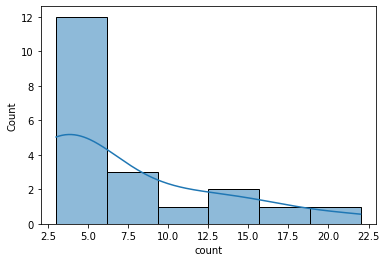

In [38]:
sns.histplot(x='count', data=df_person, kde=True)
 
plt.show()

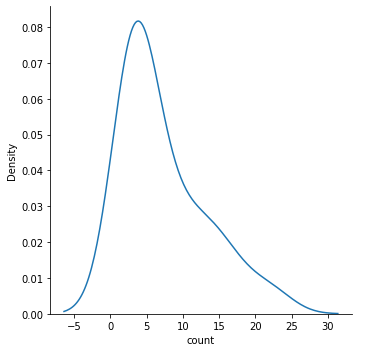

In [40]:
sns.FacetGrid(df_person, height=5) \
   .map(sns.kdeplot, "count") \
   .add_legend()
plt.show()

In [41]:
#extracting Named-Entitesfor ORG
org_list = []
for ent in tokens.ents:
    if ent.label_ == 'ORG':
        org_list.append(ent.text)
        
org_counts = Counter(org_list).most_common(20)
df_org = pd.DataFrame(org_counts, columns =['text', 'count'])

In [42]:
df_org.head()

,text,count
0,GPE,680
1,CARDINAL,440
2,Microsoft,84
3,LOC,76
4,Karnataka,44


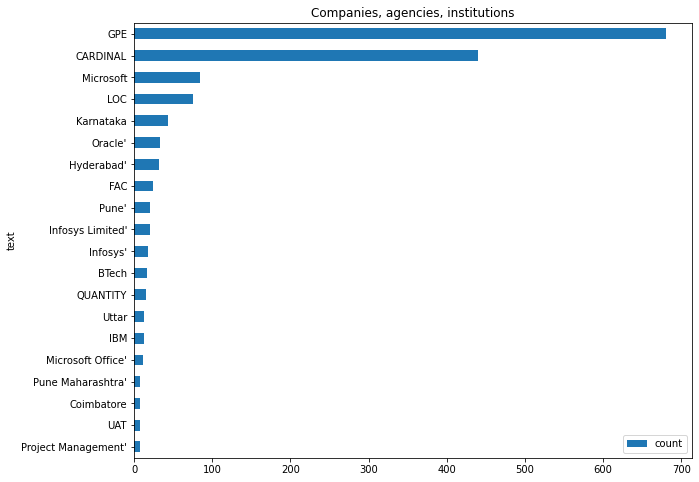

In [43]:
df_org.plot.barh(x='text', y='count', title="Companies, agencies, institutions", figsize=(10,8)).invert_yaxis()


In [44]:
#extracting Named-Entitesfor GPE
gpe_list = []
for ent in tokens.ents:
    if ent.label_ == 'GPE':
        gpe_list.append(ent.text)
        
gpe_counts = Counter(gpe_list).most_common(20)
df_gpe = pd.DataFrame(gpe_counts, columns =['text', 'count'])

In [45]:
df_gpe.head()

,text,count
0,India,31
1,US,16
2,UK,15
3,Mumbai,11
4,Telangana,7


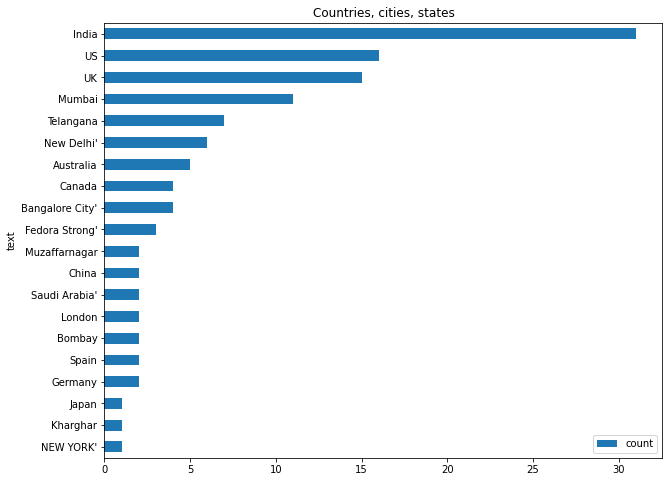

In [46]:
df_gpe.plot.barh(x='text', y='count', title="Countries, cities, states", figsize=(10,8)).invert_yaxis()


In [50]:
df.tags_LANGUAGE.unique()

array([0, 1, 6, 2])

In [51]:
#extracting Named-Entitesfor LANGUAGE
lan_list = []
for ent in tokens.ents:
    if ent.label_ == 'LANGUAGE':
        lan_list.append(ent.text)
        
lan_counts = Counter(lan_list).most_common(20)
df_lan = pd.DataFrame(lan_counts, columns =['text', 'count'])

In [52]:
df_lan.head()

,text,count
0,English,9
1,Shendra,1


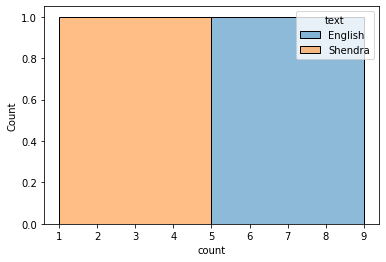

In [53]:
sns.histplot(x='count', data=df_lan, hue='text', kde=True)
 
plt.show()

In [54]:
#extracting Named-Entitesfor NORP
norp_list = []
for ent in tokens.ents:
    if ent.label_ == 'NORP':
        norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(20)
df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])

In [55]:
df_norp.head()

,text,count
0,Bengaluru,61
1,American,3
2,Atlassian,3
3,European,3
4,British,3


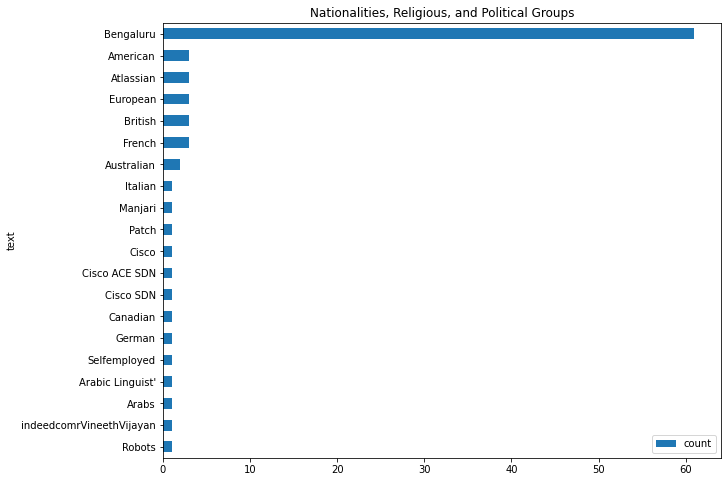

In [56]:
df_norp.plot.barh(x='text', y='count', title="Nationalities, Religious, and Political Groups", figsize=(10,8)).invert_yaxis()

In [57]:
#extracting Named-Entitesfor PRODUCT
product_list = []
for ent in tokens.ents:
    if ent.label_ == 'PRODUCT':
        product_list.append(ent.text)
        
product_counts = Counter(product_list).most_common(20)
df_product = pd.DataFrame(product_counts, columns =['text', 'count'])

In [58]:
df_product.head()

,text,count
0,Eclipse,6
1,Adobe Flex',1
2,Eclipse FlexBuilder FrameWorks,1
3,SAPUI5 Custom Applications',1
4,Languages VB Scripting',1


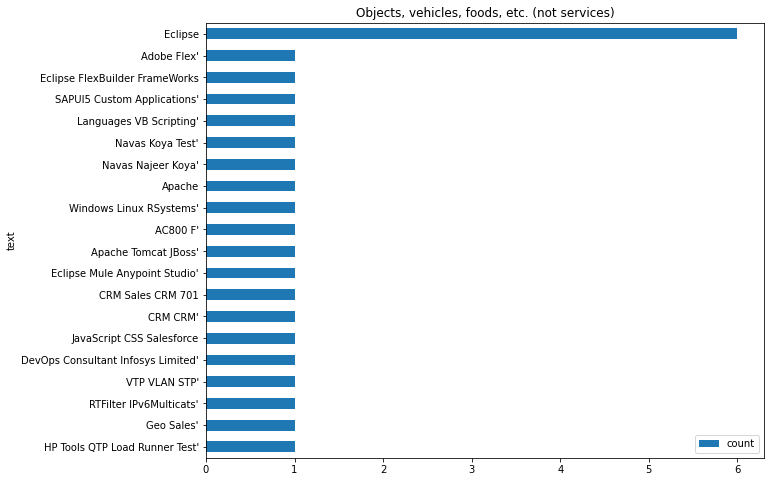

In [60]:
df_product.plot.barh(x='text', y='count', title="Objects, vehicles, foods, etc. (not services)", figsize=(10,8)).invert_yaxis()

In [61]:
#extracting Named-Entitesfor DATE
date_list = []
for ent in tokens.ents:
    if ent.label_ == 'DATE':
        date_list.append(ent.text)
        
date_counts = Counter(date_list).most_common(20)
df_date = pd.DataFrame(date_counts, columns =['text', 'count'])

In [62]:
df_date.head()

,text,count
0,daily,31
1,'2 years',28
2,'3',28
3,'1 year',25
4,'3 years',23


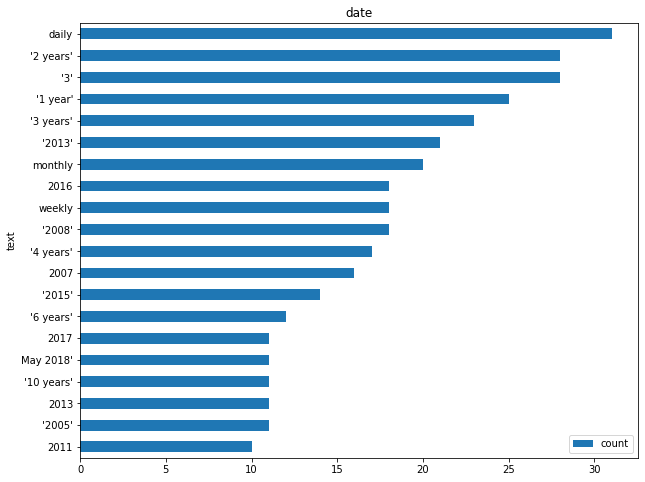

In [63]:
df_date.plot.barh(x='text', y='count', title="date", figsize=(10,8)).invert_yaxis()

In [65]:
spacy.explain("DATE")

'Absolute or relative dates or periods'